In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [104]:
# The length of time to import the data into a df takes around 40s in .py files and "Execute Selection" was not working properly.
# The VS Code is to import the file to a df only once, while debugging and further analysis took place in .py and pycharm.
Diffusion_Data = pd.read_excel("1.000_to_1.100_Diff_Conts_90000_DataPts_1000_Time.xlsx")

In [106]:
Diffusion_Data

,D,Time,R_T_Diff_Con,Var,Std_Dev,Ini_Pos,Final_Pos,Pos_Difference
0,112,1000,1.0,224000,473.286383,15500,14778.608375,721.391625
1,112,1000,1.0,224000,473.286383,15500,14888.971977,611.028023
2,112,1000,1.0,224000,473.286383,15500,15095.763750,404.236250
3,112,1000,1.0,224000,473.286383,15500,15233.771992,266.228008
4,112,1000,1.0,224000,473.286383,15500,15479.404987,20.595013
...,...,...,...,...,...,...,...,...
989995,112,1000,1.1,224000,473.286383,15500,15931.983598,-431.983598
989996,112,1000,1.1,224000,473.286383,15500,15157.932587,342.067413
989997,112,1000,1.1,224000,473.286383,15500,15376.646065,123.353935
989998,112,1000,1.1,224000,473.286383,15500,15338.302105,161.697895


In [133]:
# Get the column titles for use in pandas functions
pos_diff = Diffusion_Data.columns[-1]
diff_const = Diffusion_Data.columns.values[2]
# Diffusion_Data2 will have outliers filtered out, while Diffusion_Data is unfiltered.
Diffusion_Data2 = Diffusion_Data

In [134]:
# Filter out datapoints that are greater than 3xSD
describe_diff_by_const = Diffusion_Data2.groupby(diff_const)[pos_diff].describe()
filtered_pos = pd.Series()
for x in describe_diff_by_const.index:
    alpha_pos_val = Diffusion_Data2[pos_diff].loc[Diffusion_Data2['R_T_Diff_Con'] == x]
    alpha_pos_val = alpha_pos_val.loc[stats.zscore(np.abs(alpha_pos_val)) <= 3]
    filtered_pos = pd.concat([filtered_pos, alpha_pos_val])
Diffusion_Data2 = Diffusion_Data2[Diffusion_Data2[pos_diff].isin(filtered_pos)]

C:\Users\Mike\AppData\Local\Temp\ipykernel_14328\3672272254.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filtered_pos = pd.Series()


In [135]:
describe_diff_by_const = Diffusion_Data2.groupby(diff_const)[pos_diff].describe()
# 95% of sample means will be expected to lie within a confidence interval of ±1.96 standard errors of the sample mean
describe_diff_by_const['std_error'] = describe_diff_by_const['std']/np.sqrt(describe_diff_by_const['count'])
describe_diff_by_const['95%_conf_int'] = describe_diff_by_const['std_error'] * 1.96
# Filter out the means that are not within the 95% confidence interval of the standard error.
describe_diff_by_const = describe_diff_by_const[np.abs(describe_diff_by_const['mean']) < describe_diff_by_const['95%_conf_int']]
# Get a list of constants that are within in the interval.
describe_diff_by_const_list = describe_diff_by_const.reset_index().iloc[:, 0]
# Now filter out those constants that are not in the dataframe by only selecting constants in the list.
Diffusion_Data2 = Diffusion_Data2[Diffusion_Data2[diff_const].isin(describe_diff_by_const_list)]

In [136]:
describe_diff_by_const = Diffusion_Data2.groupby(diff_const)[pos_diff].describe()
describe_diff_by_const['3*std'] = describe_diff_by_const['std']*3 # New value after outliers removed.
describe_diff_by_const['t-test'] = [(stats.ttest_1samp(Diffusion_Data2[Diffusion_Data2[diff_const] == x][pos_diff], popmean=0)) for x in describe_diff_by_const.index.values]
describe_diff_by_const['shapiro'] = [stats.shapiro(Diffusion_Data2[Diffusion_Data2[diff_const] == x][pos_diff]) for x in describe_diff_by_const.index.values]
describe_diff_by_const

c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,count,mean,std,min,25%,50%,75%,max,3*std,t-test,shapiro
R_T_Diff_Con,,,,,,,,,,,
1.00,89197.0,-1.799669,439.821247,-1187.685292,-304.856702,-0.618479,301.927198,1186.843508,1319.463740,"(-1.2220569976683682, 0.2216893028477075)","(0.9979845285415649, 6.128916202362497e-30)"
1.01,89188.0,-1.955280,442.244103,-1196.525848,-305.434449,-2.691156,304.259831,1196.334456,1326.732308,"(-1.3203833914384937, 0.18671043428251974)","(0.9979592561721802, 4.128636710483492e-30)"
1.02,89183.0,1.498800,444.522029,-1199.098451,-307.422770,1.224627,309.761358,1198.918824,1333.566086,"(1.0069116238253093, 0.31397997749838397)","(0.9978681206703186, 1.0144121281494465e-30)"
1.03,89170.0,-0.493822,447.979168,-1209.253241,-310.469375,-0.429140,310.743533,1208.494665,1343.937503,"(-0.32917160635562714, 0.7420267560727962)","(0.9979196190834045, 2.2384654923273662e-30)"
1.04,89167.0,0.663677,448.019242,-1211.270318,-309.945069,-0.207594,309.265220,1211.473425,1344.057725,"(0.4423463374426375, 0.6582396774339063)","(0.9978818893432617, 1.2570298363399556e-30)"
1.05,89180.0,1.144770,450.454034,-1217.487535,-310.175910,0.146186,314.055295,1215.824766,1351.362101,"(0.7589299106347152, 0.4478964911280968)","(0.9979453682899475, 3.3311948845805736e-30)"
1.06,89161.0,2.928463,453.640282,-1226.179803,-311.845609,2.245909,316.510062,1226.298239,1360.920845,"(1.9275939763235366, 0.05390882141654968)","(0.9979318380355835, 2.7116281115276992e-30)"
1.07,89161.0,2.203864,456.928218,-1234.901339,-316.033603,3.724181,318.501414,1235.076498,1370.784653,"(1.4402050641186466, 0.14981290213785214)","(0.9979941248893738, 7.208697101163431e-30)"
1.08,89206.0,0.388651,460.170387,-1240.105624,-317.712853,0.108842,318.811350,1240.113258,1380.511161,"(0.2522541373249676, 0.8008452162958352)","(0.9978878498077393, 1.3618371007383669e-30)"


c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9978681206703186, pvalue=1.0144121281494465e-30)

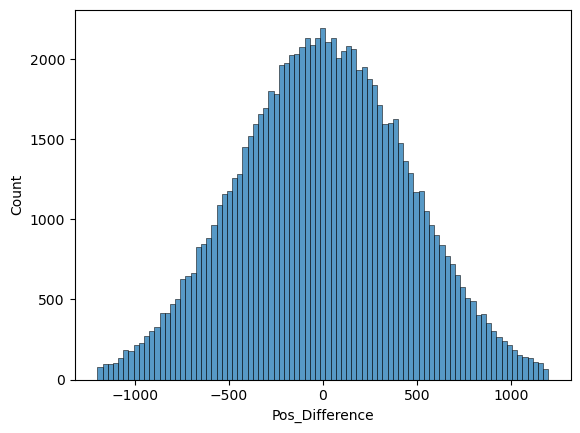

In [130]:
import seaborn as sb
hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == 1.02]
sb.histplot(hist_data)
stats.shapiro(hist_data)